In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Load the CSV file containing features and labels
data = pd.read_csv('ravdess_features.csv')

# Separate features and labels
X = data.drop(columns=['filename', 'emotion'])
y = data['emotion']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert categorical labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

In [ ]:
# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    # model = models.Sequential()
    # model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
    # model.add(layers.MaxPooling1D(2))
    # model.add(layers.Conv1D(128, 3, activation='relu'))
    # model.add(layers.MaxPooling1D(2))
    # model.add(layers.Flatten())
    # model.add(layers.Dense(128, activation='relu'))
    # model.add(layers.Dense(64, activation='relu'))
    # model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification
    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model

# def create_cnn_model(input_shape, num_classes):
#     model = models.Sequential()
#     model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(128, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(256, 3, activation='relu'))  # Adding another Conv1D layer
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model


# def create_cnn_model(input_shape, num_classes):
#     model = models.Sequential()
#     model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(128, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Dropout(0.5))  # Adding dropout to prevent overfitting
#     model.add(layers.Conv1D(256, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))  # Dropout after Dense layer
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(num_classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model



In [ ]:
# from tensorflow.keras.optimizers import Adam


In [ ]:
# def create_cnn_model(input_shape, num_classes, learning_rate=0.001):
#     model = models.Sequential()
#     model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(128, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(num_classes, activation='softmax'))
    
#     optimizer = Adam(learning_rate=learning_rate)  # Customize learning rate
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
#     return model

In [ ]:
# Reshape input data for CNN (1D convolution)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

In [ ]:
# Create and train the CNN model
model = create_cnn_model((X_train_reshaped.shape[1], 1), len(label_encoder.classes_))
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=64, validation_data=(X_test_reshaped, y_test))

# # Try different learning rates
# learning_rates = [0.001, 0.0005, 0.0001]
# for lr in learning_rates:
#     model = create_cnn_model((X_train_reshaped.shape[1], 1), len(label_encoder.classes_), learning_rate=lr)
#     history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

In [ ]:
model.summary()

In [ ]:
import pickle

# Save the model to a pickle file
with open('cnn_model2.pkl', 'wb') as file:
    pickle.dump(model, file)

Training data shape: (1152, 88)
Test data shape: (288, 88)


c:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1748 - loss: 1.9991 - val_accuracy: 0.3576 - val_loss: 1.7211
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3881 - loss: 1.6719 - val_accuracy: 0.4167 - val_loss: 1.5873
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4290 - loss: 1.4994 - val_accuracy: 0.4514 - val_loss: 1.5099
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5134 - loss: 1.3502 - val_accuracy: 0.4479 - val_loss: 1.4514
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5781 - loss: 1.1710 - val_accuracy: 0.4722 - val_loss: 1.3470
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5847 - loss: 1.1246 - val_accuracy: 0.5104 - val_loss: 1.3510
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6269 - loss: 1.0227 - val_accuracy: 0.5347 - val_loss: 1.2904
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6633 - loss: 0.9248 - val_accuracy: 0.5451 - val_loss

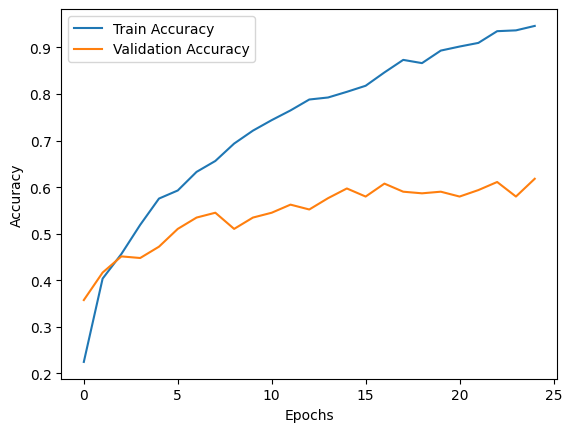

9/9 - 0s - 4ms/step - accuracy: 0.6181 - loss: 1.3190
Test accuracy: 0.6180555820465088


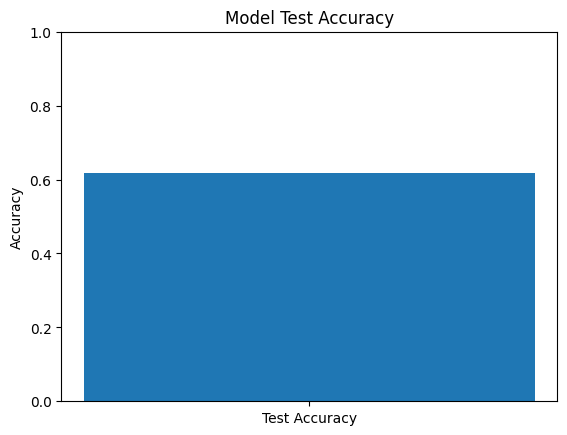

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 86, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 43, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 41, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,522 (1.02 MB)

 Trainable params: 88,840 (347.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 177,682 (694.07 KB)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


# Load the CSV file containing features and labels
data = pd.read_csv('ravdess_features.csv')

# Separate features and labels
X = data.drop(columns=['filename', 'emotion'])
y = data['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


# Reshape input data for CNN (1D convolution)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)



# Create and train the CNN model
model = create_cnn_model((X_train_reshaped.shape[1], 1), len(label_encoder.classes_))
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=64, validation_data=(X_test_reshaped, y_test))


# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


model.summary()







In [ ]:
import pickle

# Save the model to a pickle file
with open('cnn_model2.pkl', 'wb') as file:
    pickle.dump(model, file)

Training data shape: (1152, 88)
Test data shape: (288, 88)
Epoch 1/25


c:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1967 - loss: 2.0033 - val_accuracy: 0.3854 - val_loss: 1.7497
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4211 - loss: 1.6710 - val_accuracy: 0.4410 - val_loss: 1.5469
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4408 - loss: 1.4662 - val_accuracy: 0.4410 - val_loss: 1.4935
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4883 - loss: 1.3357 - val_accuracy: 0.4757 - val_loss: 1.3722
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 1.2009 - val_accuracy: 0.4896 - val_loss: 1.3341
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5956 - loss: 1.0842 - val_accuracy: 0.4965 - val_loss: 1.3231
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.9963 - val_accuracy: 0.5069 - val_loss: 1.2666
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6784 - loss: 0.9233 - val_accuracy: 0.5243 - val_loss: 1.2632
Ep

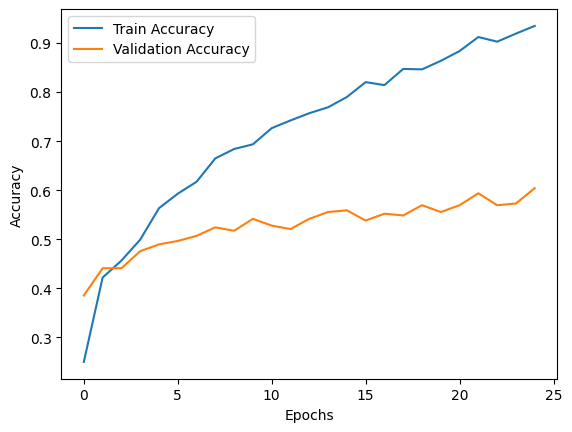

9/9 - 0s - 4ms/step - accuracy: 0.6042 - loss: 1.3743
Test accuracy: 0.6041666865348816
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Sample 1: {'angry': np.float32(0.003932446), 'calm': np.float32(2.1641099e-05), 'disgust': np.float32(0.9955647), 'fearful': np.float32(0.00044536358), 'happy': np.float32(2.858635e-06), 'neutral': np.float32(2.7253363e-06), 'sad': np.float32(8.0311665e-06), 'surprised': np.float32(2.2232065e-05)}
Sample 2: {'angry': np.float32(2.91759e-05), 'calm': np.float32(0.9914213), 'disgust': np.float32(2.7450547e-05), 'fearful': np.float32(0.00088901445), 'happy': np.float32(0.00084809394), 'neutral': np.float32(0.0060298783), 'sad': np.float32(0.0007547696), 'surprised': np.float32(3.8756022e-07)}
Sample 3: {'angry': np.float32(0.009794446), 'calm': np.float32(0.42734095), 'disgust': np.float32(0.2384782), 'fearful': np.float32(0.15031011), 'happy': np.float32(0.0038853912), 'neutral': np.float32(0.018239822), 'sad': np.float32(0.15189624), 'surprised': np.float32(5.483

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 86, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 43, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 41, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,522 (1.02 MB)

 Trainable params: 88,840 (347.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 177,682 (694.07 KB)

In [2]:
# FINAL CELL !!!!! 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the CSV file containing features and labels
data = pd.read_csv('ravdess_features.csv')

# Separate features and labels
X = data.drop(columns=['filename', 'emotion'])
y = data['emotion']

# Convert categorical labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape input data for CNN (1D convolution)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Create and train the CNN model
model = create_cnn_model((X_train_reshaped.shape[1], 1), len(label_encoder.classes_))
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Get predictions for the test set
predictions = model.predict(X_test_reshaped)

# Map predictions to a dictionary of emotion probabilities
emotion_labels = label_encoder.classes_  # Get the original class labels

# Iterate through predictions and create dictionaries
for i in range(len(predictions)):
    emotion_probs = {emotion_labels[j]: predictions[i][j] for j in range(len(emotion_labels))}
    print(f"Sample {i + 1}: {emotion_probs}")

# Summarize the model
model.summary()


import pickle

# Save the model to a pickle file
with open('cnn_model_final.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the RAVDESS feature data
data = pd.read_csv('ravdess_features.csv')

# Separate features and labels
X = data.drop(columns=['filename', 'emotion'])
y = data['emotion']

# Convert labels to numeric values using the same LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features using the same scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the features for the CNN
X_reshaped = np.expand_dims(X_scaled, axis=-1)


import numpy as np

# Predict probabilities for each class
predictions = model.predict(X_reshaped)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Map the numeric predictions back to the original emotion labels
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Print some predictions and the actual labels for comparison
for i in range(100):  # Print the first 10 samples
    print(f"Sample {i + 1}: Predicted = {predicted_labels[i]}, 
          Actual = {label_encoder.inverse_transform([y_encoded[i]])[0]}")


# Evaluate the model on the full dataset
loss, accuracy = model.evaluate(X_reshaped, y_encoded, verbose=2)
print(f"RAVDESS Dataset Accuracy: {accuracy}")
